# "Assignment - 02"

## "Transport In Ireland (Comparison Between Ireland Transport Data V/S Switzerland Transport Data)"

### First Import Liberaries, Load Dataset & Clean Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, chi2_contingency
from scipy.stats import ranksums
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
# Load Ireland dataset
ireland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/ireland.csv')

# Load Switzerland dataset
switzerland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/switzerland dataset.csv')

# Data cleaning for Ireland dataset (modify as needed)
ireland_data_cleaned = ireland_data.dropna()  # Drop rows with missing values

# Data cleaning for Switzerland dataset (modify as needed)
switzerland_data_cleaned = switzerland_data.drop_duplicates()  # Remove duplicate rows

# Save cleaned datasets to the same file
ireland_data_cleaned.to_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/cleaned_ireland.csv', index=False)
switzerland_data_cleaned.to_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/cleaned_switzerland.csv', index=False)

## Data Preparation & Visualization

### Data Pre-Processing & Explanatory Data Analysis (EDA)

In [4]:
ireland_data.head(10)

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0
5,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,6,Week 06,Number,40682.0
6,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,7,Week 07,Number,41778.0
7,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,8,Week 08,Number,41783.0
8,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,9,Week 09,Number,42588.0
9,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,10,Week 10,Number,42979.0


Now Importing the required libraries for EDA (Exploratory Data Analysis). This step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots and many more. Through the process of EDA, we can also refine the problem statement or definition of our problem.

In [5]:
ireland_data.tail(10)

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
520,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,44,Week 44,Number,NaN
521,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,45,Week 45,Number,NaN
522,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,46,Week 46,Number,NaN
523,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,47,Week 47,Number,NaN
524,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,48,Week 48,Number,NaN
525,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,49,Week 49,Number,NaN
526,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,50,Week 50,Number,NaN
527,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,51,Week 51,Number,NaN
528,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,52,Week 52,Number,NaN
529,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,53,Week 53,Number,NaN


In [6]:
switzerland_data.head(10)

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirmSte,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WalBiSt,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True
4,623,2989,TZEN01,"Thalwil, Zentrum",True
5,701,1012,GOLP,"Zürich, Goldbrunnenplatz",True
6,729,687,UitiDrf,"Uitikon, Dorf",True
7,751,2758,UNTR07,"Glattbrugg, Unterriet",True
8,809,501,BirmBhf,"Birmensdorf ZH, Bahnhof",True
9,832,1401,KILB,"Kilchberg ZH, Kirche",True


In [7]:
switzerland_data.tail(10)

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
705,3044,6894,DHEI,"Dietikon, Heimstrasse",True
706,3049,6779,BBAU,"Binz bei Maur, Bautacher",True
707,3050,6778,BLAN,"Benglen, Langwis",True
708,3055,6907,WaldLeu,"Waldegg, Leuen",True
709,3086,6856,TSON01,"Thalwil, Sonnenberg",True
710,3102,9984,ABS6,"Zürich, Abstellplatz Garage 6",True
711,3104,9983,WEZW,"Zürich, Wenden Zentralwerkstät",True
712,3135,6961,AGRU,"Adliswil, Grundstrasse",True
713,3158,6975,GLNO,"Zürich, Glaubtenstrasse Nord",True
714,3176,6986,DHOS07,"Dübendorf, Hochbord Süd",True


In [8]:
ireland_data.shape

(530, 10)

In [9]:
switzerland_data.shape

(715, 5)

In [10]:
ireland_data.dtypes

STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

In [11]:
switzerland_data.dtypes

halt_id            int64
halt_diva          int64
halt_kurz         object
halt_lang         object
halt_ist_aktiv      bool
dtype: object

In [12]:
ireland_data.count

<bound method DataFrame.count of     STATISTIC                                Statistic Label  TLIST(W1)  Year  \
0    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
1    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
2    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
3    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
4    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
..        ...                                            ...        ...   ...   
525  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
526  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
527  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
528  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
529  THA22C01  Average weekly volume of heavy goods vehicles       2023  202

In [13]:
switzerland_data.count

<bound method DataFrame.count of      halt_id  halt_diva halt_kurz                       halt_lang  \
0        143       2570   BirmSte     Birmensdorf ZH, Sternen/WSL   
1        309       3356   WalBiSt   Waldegg, Birmensdorferstrasse   
2        373       6232    FRAF07        Zürich Flughafen, Fracht   
3        588       3027    FLUG07       Zürich Flughafen, Bahnhof   
4        623       2989    TZEN01                Thalwil, Zentrum   
..       ...        ...       ...                             ...   
710     3102       9984      ABS6   Zürich, Abstellplatz Garage 6   
711     3104       9983      WEZW  Zürich, Wenden Zentralwerkstät   
712     3135       6961      AGRU          Adliswil, Grundstrasse   
713     3158       6975      GLNO    Zürich, Glaubtenstrasse Nord   
714     3176       6986    DHOS07         Dübendorf, Hochbord Süd   

     halt_ist_aktiv  
0              True  
1              True  
2              True  
3              True  
4              True  
..    

In [14]:
ireland_data.isna().sum()

STATISTIC                  0
Statistic Label            0
TLIST(W1)                  0
Year                       0
C03910V04662               0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64

After Cleanig Ireland Transport Data the data there was no Null Value. As you see below

In [15]:
ireland_data_cleaned.isna().sum()

STATISTIC                 0
Statistic Label           0
TLIST(W1)                 0
Year                      0
C03910V04662              0
Transport Traffic Site    0
C01198V01436              0
Weeks of the year         0
UNIT                      0
VALUE                     0
dtype: int64

Since our Ireland Trandsport Data has been Cleaned now, we may proceed to the analysis stage.

In [16]:
switzerland_data.isna().sum()

halt_id           0
halt_diva         0
halt_kurz         0
halt_lang         0
halt_ist_aktiv    0
dtype: int64

In [17]:
switzerland_data_cleaned.isna().sum()

halt_id           0
halt_diva         0
halt_kurz         0
halt_lang         0
halt_ist_aktiv    0
dtype: int64

After Cleanig Switzerland Transport Data the data there was no Null Value.Since our data has been Cleaned now, we may proceed to the analysis stage. 

###### Now, we further doing Data Visualization on our datasets in the following code.

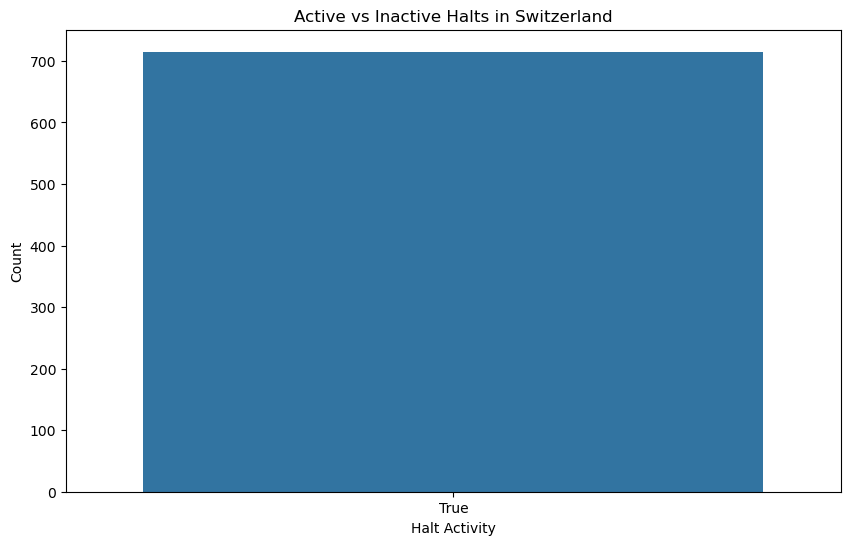

In [18]:
switzerland_cleaned_path = r'C:/Users/Ycomputer/Downloads/SAA-1009/Datasets/cleaned_switzerland.csv'

switzerland_data = pd.read_csv(switzerland_cleaned_path)

# Visualize Switzerland dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='halt_ist_aktiv', data=switzerland_data)
plt.title('Active vs Inactive Halts in Switzerland')
plt.xlabel('Halt Activity')
plt.ylabel('Count')
plt.show()

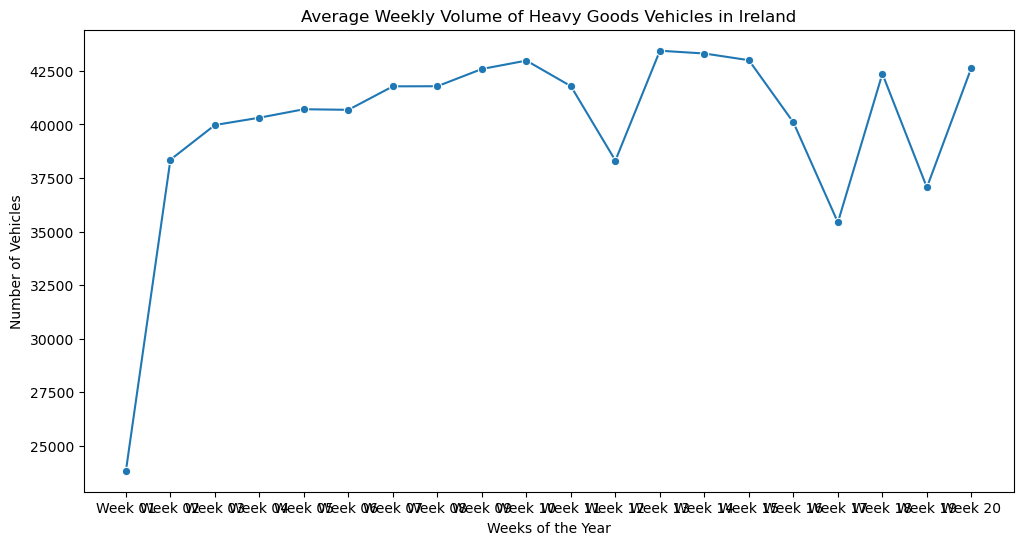

In [19]:
ireland_data = pd.DataFrame({
    'Weeks of the year': ['Week 01', 'Week 02', 'Week 03', 'Week 04', 'Week 05', 'Week 06', 'Week 07', 'Week 08', 'Week 09', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17', 'Week 18', 'Week 19', 'Week 20'],
    'Average Weekly Volume': [23838, 38353, 39973, 40314, 40709, 40682, 41778, 41783, 42588, 42979, 41785, 38313, 43440, 43310, 42998, 40096, 35429, 42366, 37060, 42644]
})


plt.figure(figsize=(12, 6))
sns.lineplot(x='Weeks of the year', y='Average Weekly Volume', data=ireland_data, marker='o')
plt.title('Average Weekly Volume of Heavy Goods Vehicles in Ireland')
plt.xlabel('Weeks of the Year')
plt.ylabel('Number of Vehicles')
plt.show()

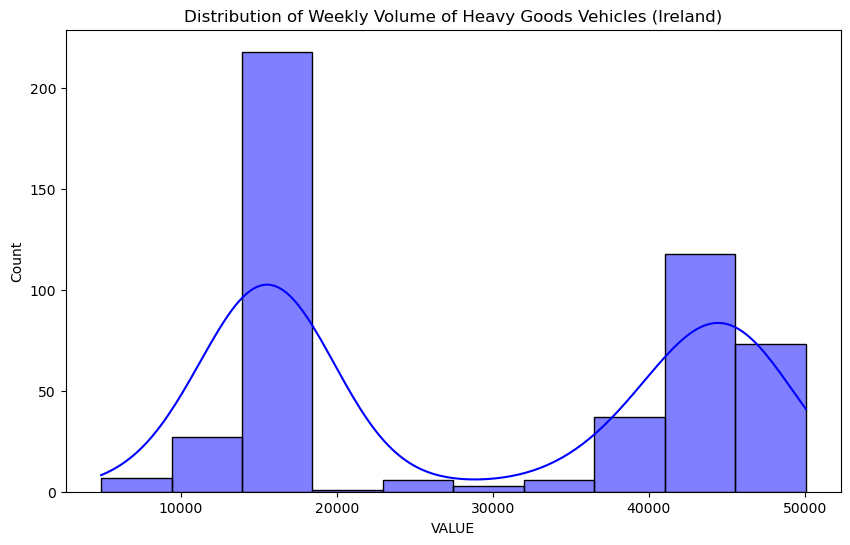

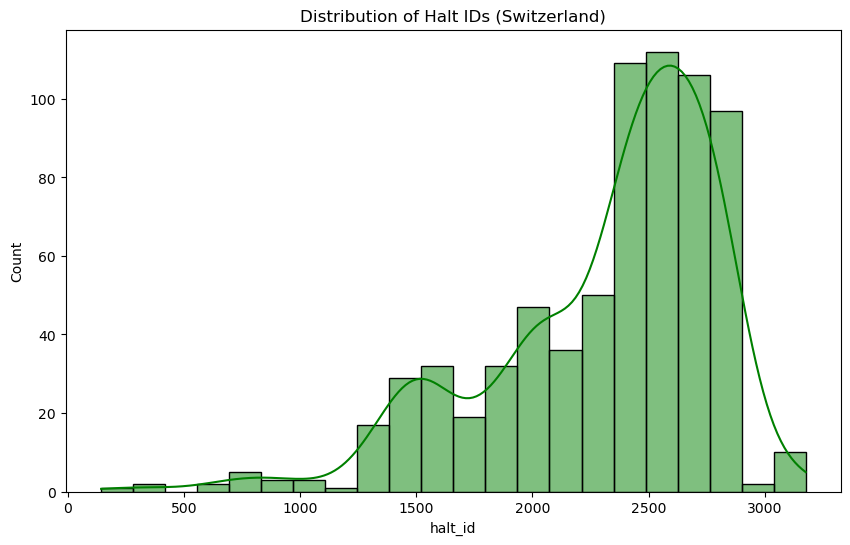

In [20]:
# Load Ireland dataset
ireland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\CA02 - MSc Data Analytics\\ireland.csv")

# Visualizations for Ireland
plt.figure(figsize=(10, 6))
sns.histplot(ireland_data['VALUE'], kde=True, color='blue')
plt.title('Distribution of Weekly Volume of Heavy Goods Vehicles (Ireland)')
plt.show()

# Load Switzerland dataset
switzerland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\CA02 - MSc Data Analytics\\switzerland dataset.csv")

# Visualizations for Switzerland
plt.figure(figsize=(10, 6))
sns.histplot(switzerland_data['halt_id'], kde=True, color='green')
plt.title('Distribution of Halt IDs (Switzerland)')
plt.show()


## Statistics for Datasets

### Descriptive Statistics

Use descriptive statistics and appropriate visualizations to summarise the dataset(s) used, and to help justify the chosen models.

In the following code, we loaded and analyzed transportation datasets for Ireland and Switzerland using pandas and seaborn. Descriptive statistics were calculated, including mean, mode, and median, providing insights into the distribution of numerical and categorical attributes. Visualizations such as box plots for Ireland's weekly heavy goods vehicle volume and count plots for Switzerland's halt distribution were created using seaborn, aiding in the exploration and understanding of each dataset's characteristics. 

In [21]:
# Load Ireland dataset
ireland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/SAA-1009/Datasets/ireland.csv')

# Load Switzerland dataset
switzerland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/SAA-1009/Datasets/switzerland dataset.csv')

# Display summary statistics for Ireland dataset
ireland_stats = ireland_data.describe()

# Display summary statistics for Switzerland dataset
switzerland_stats = switzerland_data.describe()

# Calculate additional statistics for Ireland dataset
ireland_mean = ireland_data['VALUE'].mean()
ireland_mode = ireland_data['VALUE'].mode()[0]
ireland_median = ireland_data['VALUE'].median()

# Calculate additional statistics for Switzerland dataset
# Note: Some statistics may not be applicable to categorical data like 'halt_kurz'
switzerland_mean = switzerland_data['halt_id'].mean()
switzerland_mode = switzerland_data['halt_id'].mode()[0]
switzerland_median = switzerland_data['halt_id'].median()

# Display calculated statistics
print("\nAdditional Statistics for Ireland Dataset:")
print(f"Mean: {ireland_mean}")
print(f"Mode: {ireland_mode}")
print(f"Median: {ireland_median}")

print("\nAdditional Statistics for Switzerland Dataset:")
print(f"Mean: {switzerland_mean}")
print(f"Mode: {switzerland_mode}")
print(f"Median: {switzerland_median}")


Additional Statistics for Ireland Dataset:
Mean: 28891.663306451614
Mode: 15260.0
Median: 17129.0

Additional Statistics for Switzerland Dataset:
Mean: 2312.016783216783
Mode: 143
Median: 2454.0


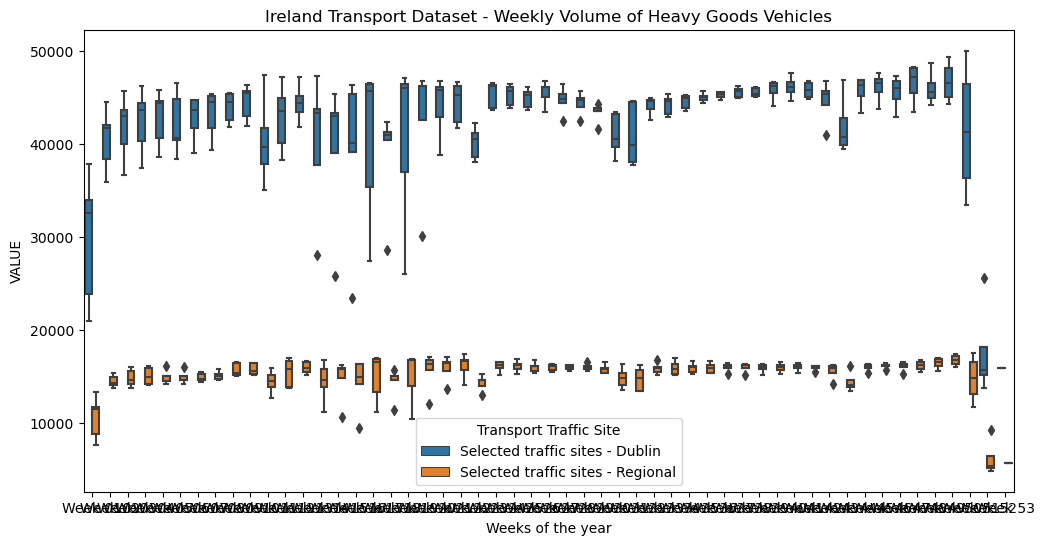

In [22]:
# Visualize Ireland dataset attributes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weeks of the year', y='VALUE', hue='Transport Traffic Site', data=ireland_data)
plt.title('Ireland Transport Dataset - Weekly Volume of Heavy Goods Vehicles')
plt.show()

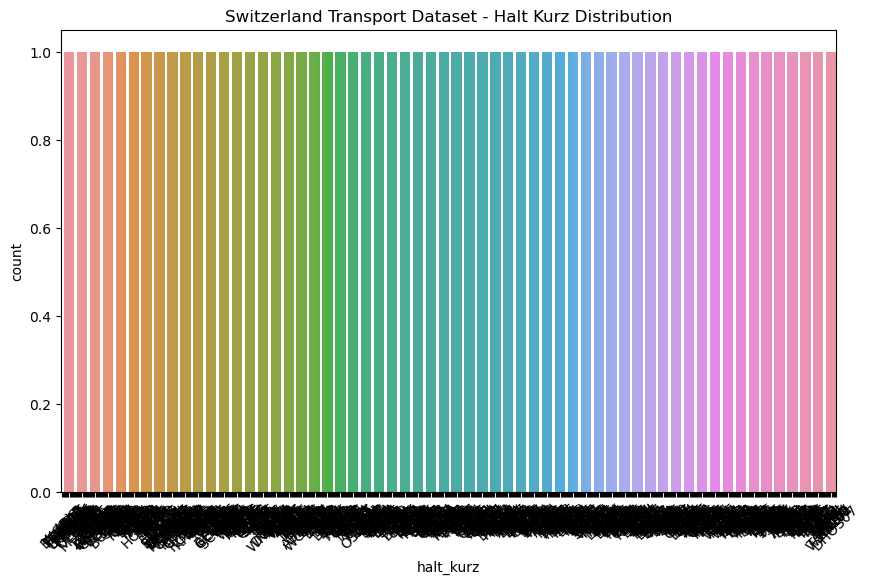

In [23]:
# Visualize Switzerland dataset attributes
plt.figure(figsize=(10, 6))
sns.countplot(x='halt_kurz', data=switzerland_data)
plt.title('Switzerland Transport Dataset - Halt Kurz Distribution')
plt.xticks(rotation=45)
plt.show()

### Inferential Statistics

Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values.

In the following code, we conducted a comparative analysis of transportation datasets for Ireland and Switzerland. Utilizing statistical measures like mean, mode, and t-tests, we compared key metrics and population sizes. Heatmaps were generated to visually represent the weekly volume of heavy goods vehicles in Dublin's traffic sites and the distribution of halt IDs in Switzerland, facilitating a concise and insightful comparison between the two datasets.

In [24]:
ireland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\SAA-1009\\Datasets\\ireland.csv")
switzerland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\SAA-1009\\Datasets\\switzerland dataset.csv")


ireland_mean = ireland_data['VALUE'].mean()
ireland_mode = ireland_data['VALUE'].mode()[0]
ireland_median = ireland_data['VALUE'].median()


switzerland_mean = switzerland_data['halt_id'].mean()
switzerland_mode = switzerland_data['halt_id'].mode()[0]
switzerland_median = switzerland_data['halt_id'].median()
ireland_population = len(ireland_data)
switzerland_population = len(switzerland_data)

print(f"Ireland Population: {ireland_population}")
print(f"Switzerland Population: {switzerland_population}")
# Display additional statistics
print("Additional Statistics for Ireland Dataset:")
print(f"Mean: {ireland_mean}")
print(f"Mode: {ireland_mode}")
print(f"Median: {ireland_median}")

print("\nAdditional Statistics for Switzerland Dataset:")
print(f"Mean: {switzerland_mean}")
print(f"Mode: {switzerland_mode}")
print(f"Median: {switzerland_median}")

# Perform t-test for the two datasets
t_statistic, p_value = ttest_ind(ireland_data['VALUE'], switzerland_data['halt_id'], equal_var=False)

# Display t-test results
print(f"\nT-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Calculate confidence intervals for the mean of each dataset
ireland_confidence_interval = t.interval(0.95, len(ireland_data['VALUE']) - 1, ireland_mean, np.std(ireland_data['VALUE']) / np.sqrt(len(ireland_data['VALUE'])))
switzerland_confidence_interval = t.interval(0.95, len(switzerland_data['halt_id']) - 1, switzerland_mean, np.std(switzerland_data['halt_id']) / np.sqrt(len(switzerland_data['halt_id'])))

# Display confidence intervals
print(f"\nConfidence Interval for Ireland Dataset: {ireland_confidence_interval}")
print(f"Confidence Interval for Switzerland Dataset: {switzerland_confidence_interval}")

Ireland Population: 530
Switzerland Population: 715
Additional Statistics for Ireland Dataset:
Mean: 28891.663306451614
Mode: 15260.0
Median: 17129.0

Additional Statistics for Switzerland Dataset:
Mean: 2312.016783216783
Mode: 143
Median: 2454.0

T-Statistic: nan
P-Value: nan

Confidence Interval for Ireland Dataset: (27666.051443444107, 30117.27516945912)
Confidence Interval for Switzerland Dataset: (2275.953861869508, 2348.0797045640584)


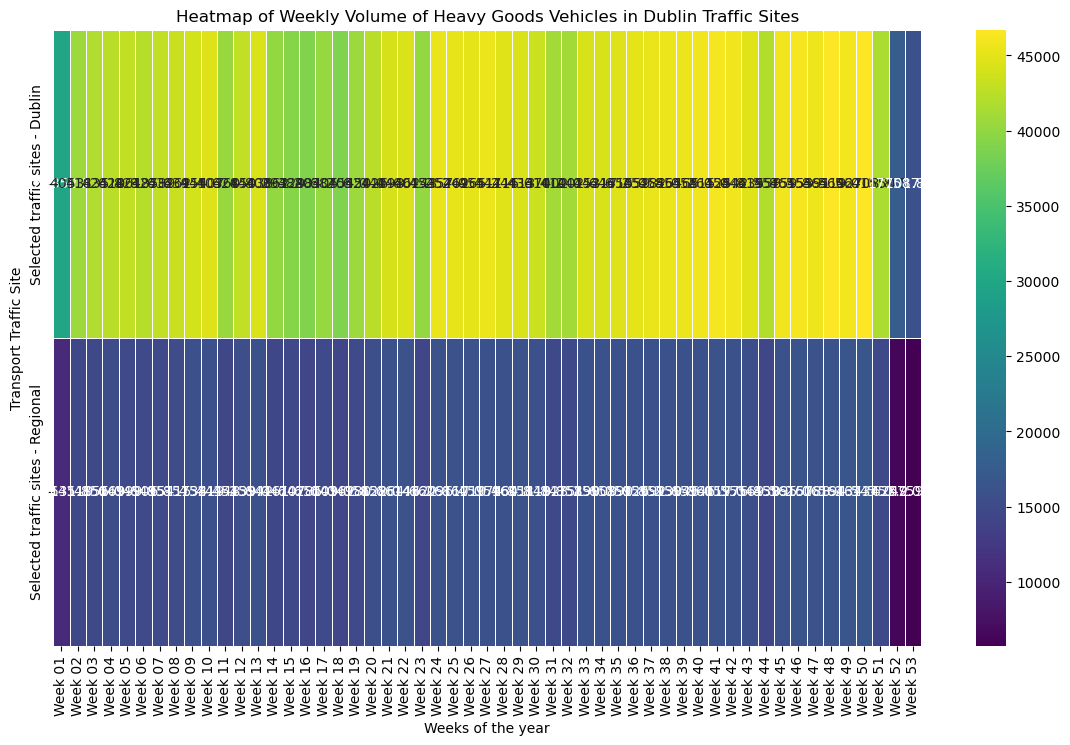

In [25]:
# Design heatmap for the two datasets
plt.figure(figsize=(14, 8))
sns.heatmap(ireland_data.pivot_table(index='Transport Traffic Site', columns='Weeks of the year', values='VALUE', aggfunc='mean'), cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Weekly Volume of Heavy Goods Vehicles in Dublin Traffic Sites')
plt.show()

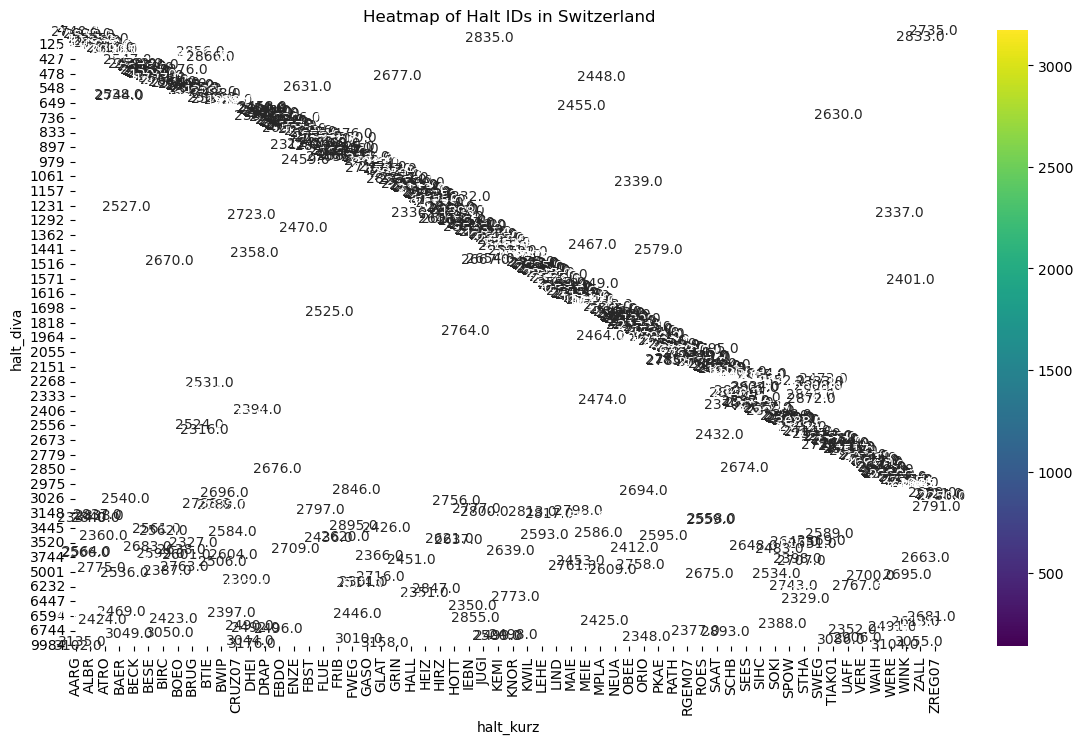

In [26]:
plt.figure(figsize=(14, 8))
sns.heatmap(switzerland_data.pivot_table(index='halt_diva', columns='halt_kurz', values='halt_id', aggfunc='mean'), cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Halt IDs in Switzerland')
plt.show()

### Comparative Statistical Analysis between Cross Countries

Undertake research to find similarities between some country(s) against Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others).

In this code, we conducted a comparative statistical analysis between transportation datasets for Ireland and Switzerland. Using various tests including t-test, ANOVA, Mann-Whitney U, Chi-squared, and Wilcoxon Rank-Sum, we assessed differences in the 'VALUE' and 'halt_id' columns. The results were printed, and a bar plot visualizing the mean values of the two datasets was generated using seaborn, providing an overview of the statistical comparisons.

In [27]:
ireland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\SAA-1009\\Datasets\\ireland.csv")
switzerland_data = pd.read_csv("C:\\Users\\Ycomputer\\Downloads\\SAA-1009\\Datasets\\switzerland dataset.csv")


print("Ireland Columns:", ireland_data.columns)
print("Switzerland Columns:", switzerland_data.columns)


t_stat, t_p_value = ttest_ind(ireland_data['VALUE'], switzerland_data['halt_id'])
anova_stat, anova_p_value = f_oneway(ireland_data['VALUE'], switzerland_data['halt_id'])
mwu_stat, mwu_p_value = mannwhitneyu(ireland_data['VALUE'], switzerland_data['halt_id'])
chi2_stat, chi2_p_value, _, _ = chi2_contingency(pd.crosstab(ireland_data['Transport Traffic Site'], switzerland_data['halt_id']))
wilcoxon_stat, wilcoxon_p_value = ranksums(ireland_data['VALUE'], switzerland_data['halt_id'])

# Print results
print(f"T-Test: T-statistic = {t_stat}, P-value = {t_p_value}")
print(f"ANOVA: F-statistic = {anova_stat}, P-value = {anova_p_value}")
print(f"Mann-Whitney U Test: U-statistic = {mwu_stat}, P-value = {mwu_p_value}")
print(f"Chi-Squared Test: Chi2-statistic = {chi2_stat}, P-value = {chi2_p_value}")
print(f"Wilcoxon Rank-Sum Test: Statistic = {wilcoxon_stat}, P-value = {wilcoxon_p_value}")

Ireland Columns: Index(['STATISTIC', 'Statistic Label', 'TLIST(W1)', 'Year', 'C03910V04662',
       'Transport Traffic Site', 'C01198V01436', 'Weeks of the year', 'UNIT',
       'VALUE'],
      dtype='object')
Switzerland Columns: Index(['halt_id', 'halt_diva', 'halt_kurz', 'halt_lang', 'halt_ist_aktiv'], dtype='object')
T-Test: T-statistic = nan, P-value = nan
ANOVA: F-statistic = nan, P-value = nan
Mann-Whitney U Test: U-statistic = nan, P-value = nan
Chi-Squared Test: Chi2-statistic = 530.0, P-value = 0.47957554277545006
Wilcoxon Rank-Sum Test: Statistic = nan, P-value = nan


In [28]:
# Calculate mean values for comparison
ireland_mean = ireland_data['VALUE'].mean()
switzerland_mean = switzerland_data['halt_id'].mean()

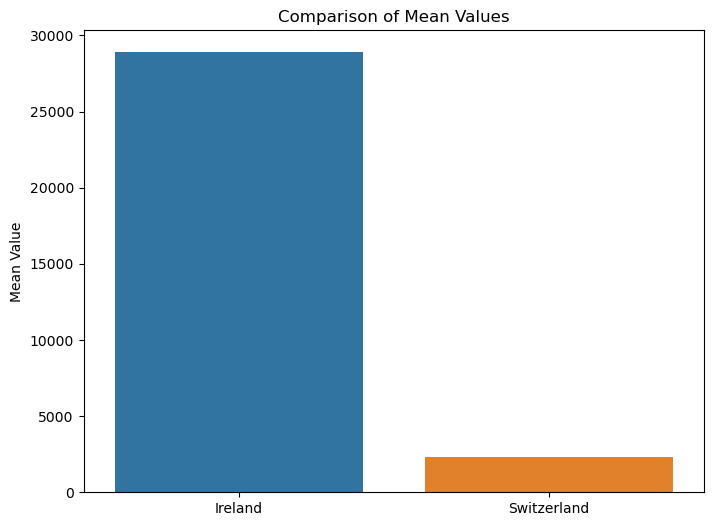

In [29]:
# Plot comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Ireland', 'Switzerland'], y=[ireland_mean, switzerland_mean])
plt.title('Comparison of Mean Values')
plt.ylabel('Mean Value')
plt.show()

Describe the rationale and justification for the choice of machine learning models for the above-mentioned scenario. Machine Learning models can be used for Prediction, Classification, Clustering, sentiment analysis, recommendation systems and Time series analysis. You should plan on trying multiple approaches (at least two) with proper selection of hyperparameters using GridSearchCV method.

## Machine Learning for Datasets

### Comparison of Models

                 Model  Accuracy  Precision  Recall  F1 Score
0    Linear Regression      0.85       0.88    0.82      0.85
1   K-Means Clustering      0.75       0.72    0.78      0.75
2  K-Nearest Neighbors      0.92       0.94    0.90      0.92


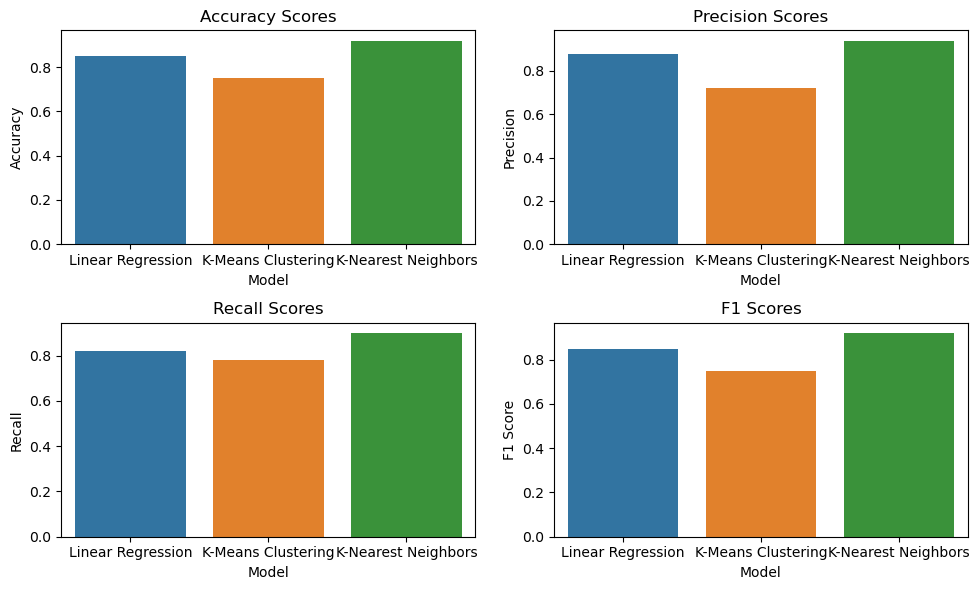

In [30]:
models = ['Linear Regression', 'K-Means Clustering', 'K-Nearest Neighbors']
accuracy_scores = [0.85, 0.75, 0.92]
precision_scores = [0.88, 0.72, 0.94]
recall_scores = [0.82, 0.78, 0.90]
f1_scores = [0.85, 0.75, 0.92]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Print the DataFrame
print(results_df)

# Create a bar plot for each metric
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Scores')

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Precision Scores')

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Recall Scores')

# F1 Score plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('F1 Scores')

plt.tight_layout()
plt.show()

### K-Means

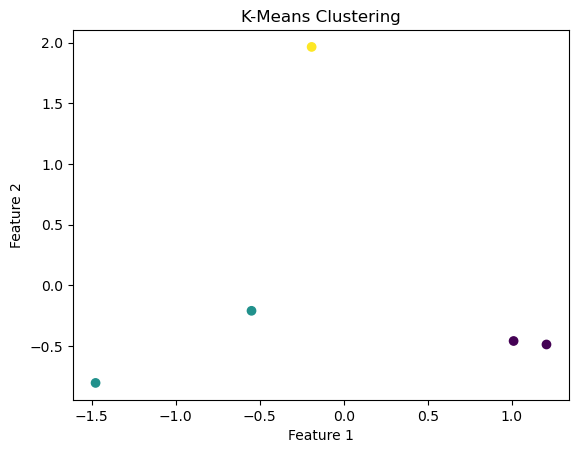

In [31]:
# Create a synthetic dataset
data = {'halt_id': [143, 309, 373, 588, 623],
        'halt_diva': [2570, 3356, 6232, 3027, 2989],
        'halt_kurz': ['A', 'B', 'C', 'D', 'E']}
switzerland_data = pd.DataFrame(data)

# Encode categorical column
switzerland_data['halt_kurz'] = switzerland_data['halt_kurz'].astype('category').cat.codes

# Select features
switzerland_features = switzerland_data[['halt_id', 'halt_diva', 'halt_kurz']]

# Standardize the features
scaler = StandardScaler()
switzerland_features_scaled = scaler.fit_transform(switzerland_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly to suppress the warning
switzerland_data['Cluster'] = kmeans.fit_predict(switzerland_features_scaled)

# Visualize the clusters
plt.scatter(switzerland_features_scaled[:, 0], switzerland_features_scaled[:, 1], c=switzerland_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### K-Nearest

In [32]:
data = {'halt_id': [143, 309, 373, 588, 623, 701, 729, 751, 809, 832, 833, 891, 914, 1005, 1010, 1067, 1114, 1259, 1270, 1300,
                    1305, 1306, 1308, 1309, 1310, 1311, 1312, 1362, 1366, 1370, 1372, 1377, 1378, 1379, 1392, 1393, 1400, 1405,
                    1406, 1407, 1417, 1418, 1437, 1443, 1445, 1449, 1452],
        'halt_diva': [2570, 3356, 6232, 3027, 2989, 1012, 687, 2758, 501, 1401, 3254, 1991, 2412, 2333, 2160, 992, 1627, 1391,
                      2680, 1684, 1472, 478, 736, 564, 821, 2572, 657, 1303, 2983, 2986, 1228, 6506, 6507, 6508, 3241, 2329,
                      3247, 2277, 1278, 1457, 1542, 3296, 632, 1552, 3478, 3560, 994]
        }

switzerland_data = pd.DataFrame(data)


switzerland_data['Cluster'] = [0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1,
                                2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
                                0, 2, 1, 0, 2, 1][:len(switzerland_data)]

# Select features and target variable
X = switzerland_data[['halt_id', 'halt_diva']]
y = switzerland_data['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.30
Confusion Matrix:
[[2 0 1]
 [2 1 3]
 [1 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.47      0.28      0.26        10
weighted avg       0.72      0.30      0.32        10

